# TIỀN XỬ LÝ DỮ LIỆU

## I.Làm sạch dữ liệu

#### 1.Kiểm tra dữ liệu khuyết thiếu

In [1]:
import numpy as np
import pandas as pd

###### Kiểm tra dữ liệu khuyết thiếu : isna(), isnull()
###### Kiểm tra dữ liệu không khuyết thiếu : notna(), notnull()

In [2]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df


,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [3]:
df.isna()
# True là vị trí thiếu

,0,1,2
0,False,False,True
1,False,False,False
2,True,True,True
3,False,False,False
4,False,False,False


In [4]:
df.notna()
# True là vị trí có giá trị

,0,1,2
0,True,True,False
1,True,True,True
2,False,False,False
3,True,True,True
4,True,True,True


In [5]:
df[df.columns[0]].isna()

0    False
1    False
2     True
3    False
4    False
Name: 0, dtype: bool

In [6]:
df.iloc[0].isna()

0    False
1    False
2     True
Name: 0, dtype: bool

#### 2.Xử lý dữ liệu khuyết thiếu

#####   Xóa dòng chứa ít nhất 1 giá trị bị khuyết thiếu: dropna()

In [7]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [8]:
df.dropna()

,0,1,2
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Xóa cột chứa ít nhất 1 giá trị khuyết thiếu dropna(axis=1)

In [9]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df.dropna(axis=1)

""
0
1
2
3
4


##### Xóa các dòng chứa toàn các giá trị khuyết thiếu dropna(how = 'all')

In [10]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])
df.dropna(how='all')

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Giữ lại những dòng có ít nhất n giá trị khuyết thiếu dropna(thresh=n)

In [11]:
df.dropna(thresh=1)

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Xóa những dòng nếu có dữ liệu khuyết thiếu trên một số cột nhất định: dropna(subet=[columns])

In [12]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

In [13]:
df.dropna(subset=[0,2])

,0,1,2
1,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế dữ liệu khuyết thiếu fillna()

### Thay thế giá trị khuyết bằng 1 giá trị vô hướng fillna(value)
##### THay các số ít ảnh hưởng: 0 hoặc giá trị trung bình

In [14]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [15]:
df.fillna(0)

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế giá trị khuyết bằng giá trị trước đó fillna(method='ffill')  kiểu dữ liệu chuỗi thời gian

In [16]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

df.fillna(method = 'ffill')

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,9.0,5.0,12.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


#### Thay thế giá trị khuyết bằng giá trị sau đó fillna(method='bfill')

In [17]:
df.fillna(method='bfill')

,0,1,2
0,100.0,6.0,12.0
1,9.0,5.0,12.0
2,-3.0,4.0,-200.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


##### Thay thế giá trị khuyết bằng các giá trị xác định trên mỗi cột: fillna(value = {columns:value})

In [18]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

In [19]:
df.fillna(value={0:100,2:200})

,0,1,2
0,100.0,6.0,200.0
1,9.0,5.0,12.0
2,100.0,NaN,200.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


## II. Xử lý giá trị ngoại lai

### 1 Xác định dữ liệu ngoại lai

##### Phương pháp trực quan hóa Box plot, Scatter plot

In [20]:
points = pd.DataFrame([[100, 6], [9, 5], [3, 5], [1,-200],[2, 0], [3, -4], [-2, 5], [-1, -10]], columns = ['X', 'Y'])
points


,X,Y
0,100,6
1,9,5
2,3,5
3,1,-200
4,2,0
5,3,-4
6,-2,5
7,-1,-10


<AxesSubplot: xlabel='X', ylabel='Y'>

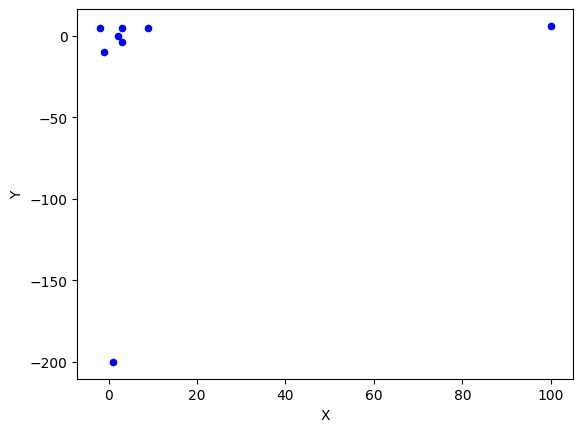

In [21]:
import matplotlib.pyplot as plt

points.plot.scatter(x='X',y = 'Y',c='blue')

##### Phương pháp toán học Z-score

In [22]:
df

,0,1,2
0,100.0,6.0,NaN
1,9.0,5.0,12.0
2,NaN,NaN,NaN
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [23]:
from scipy import stats

df  = df.fillna(0)
df

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [24]:
z = stats.zscore(df)
z

,0,1,2
0,1.989925,1.185854,0.441327
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
3,-0.624390,0.395285,-1.996943
4,-0.497481,-1.185854,0.526666


##### Xác định ngoại lai theo ngưỡng np.where(z>threshold)

In [25]:
noisy = np.where((z>1.2) | (z<-1.2))
print(noisy)

(array([0, 3], dtype=int64), array([0, 2], dtype=int64))


##### IQR Score

In [26]:
# Sắp xếp giá trị từ bé đến lớn
import pandas as pd
iqr_data = pd.Series([3, 5, 7, 8, 9, 11, 15, 16, 20, 21])

middle = iqr_data.median()
iqr_data1 = pd.Series([3, 5, 7, 8, 9])
q1 = iqr_data1.median()
iqr_data3 = pd.Series([11, 15, 16, 20, 21])
q3 = iqr_data3.median()
iqr = q3-q1
iqr

left_limit = q1 - 1.5*iqr
right_limit = q3 + 1.5*iqr
print(left_limit,right_limit)

-6.5 29.5


In [27]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

0    9.0
1    5.0
2    7.0
dtype: float64


In [28]:
df

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [29]:
noisy = (df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))
noisy

,0,1,2
0,True,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False


### 2.Xử lý dữ liệu ngoại lai

Sửa: Tùy thuộc bài toán, yêu cầu cụ thể sẽ thay thế theo dữ liệu thực tế

##### xóa theo Z-score

In [30]:
z

,0,1,2
0,1.989925,1.185854,0.441327
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
3,-0.624390,0.395285,-1.996943
4,-0.497481,-1.185854,0.526666


In [31]:
z = z[((z<1.2) & (z> -1.2)).all(axis=1)]
z

,0,1,2
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
4,-0.497481,-1.185854,0.526666


##### Xóa theo IQR Score

In [32]:
df = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis=1)]
df

,0,1,2
1,9.0,5.0,12.0
2,0.0,0.0,0.0
4,2.0,0.0,7.0


### 3.Chuẩn hóa dữ liệu

##### z-Score scaling

In [33]:
df = pd.DataFrame([[100, 6, 5], 
                  [9, 5, 12], 
                  [6, 1, 0], 
                  [-3, 4, -200],
                  [2, 0, 7]], columns=['A', 'B', 'C'])
df


,A,B,C
0,100,6,5
1,9,5,12
2,6,1,0
3,-3,4,-200
4,2,0,7


In [34]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)
print(df_s)

df_s = pd.DataFrame(df_s,columns=['A','B','C'])
df_s

[[ 1.98921509  1.2094158   0.48733323]
 [-0.35558508  0.77748158  0.57219225]
 [-0.43288619 -0.95025527  0.42671965]
 [-0.6647895   0.34554737 -1.9978238 ]
 [-0.53595433 -1.38218948  0.51157867]]


,A,B,C
0,1.989215,1.209416,0.487333
1,-0.355585,0.777482,0.572192
2,-0.432886,-0.950255,0.426720
3,-0.664789,0.345547,-1.997824
4,-0.535954,-1.382189,0.511579


<AxesSubplot: xlabel='A'>

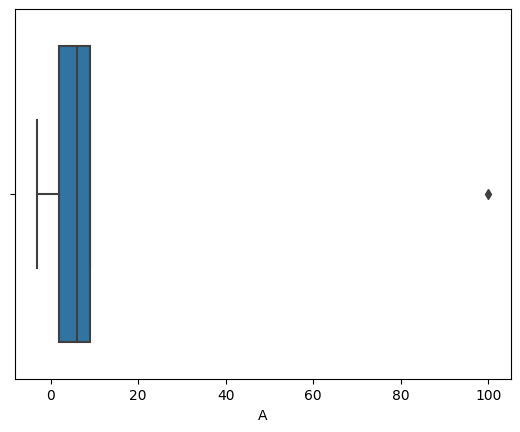

In [35]:
import seaborn as sns

sns.boxplot(x = df['A'])

<AxesSubplot: xlabel='A'>

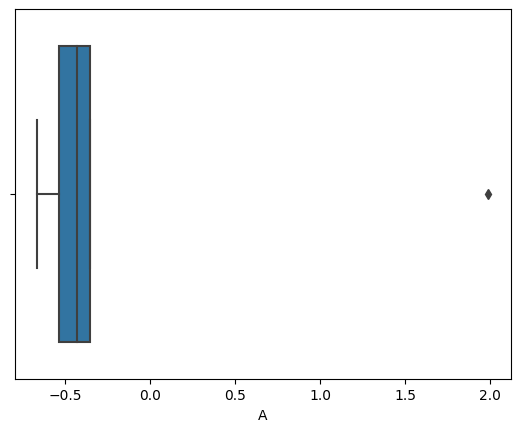

In [36]:
sns.boxplot(x = df_s['A'])

##### Min-max scaling

In [37]:
# Giá trị min = 0, max = 1
# Các giá trị khác tính theo tỉ lệ

from sklearn.preprocessing import MinMaxScaler

s_scaler = MinMaxScaler()
df_s = s_scaler.fit_transform(df)
print(df_s)

df_s = pd.DataFrame(df_s,columns=['A','B','C'])
df_s

[[1.         1.         0.96698113]
 [0.11650485 0.83333333 1.        ]
 [0.08737864 0.16666667 0.94339623]
 [0.         0.66666667 0.        ]
 [0.04854369 0.         0.97641509]]


,A,B,C
0,1.000000,1.000000,0.966981
1,0.116505,0.833333,1.000000
2,0.087379,0.166667,0.943396
3,0.000000,0.666667,0.000000
4,0.048544,0.000000,0.976415


<AxesSubplot: xlabel='A'>

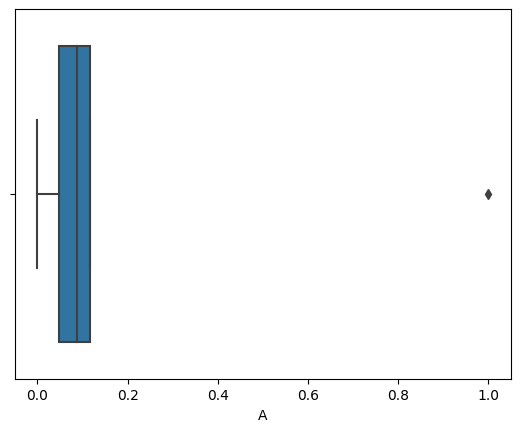

In [38]:
sns.boxplot(x = df_s['A'])

##### Robust Scaling

In [39]:
df

,A,B,C
0,100,6,5
1,9,5,12
2,6,1,0
3,-3,4,-200
4,2,0,7


In [40]:
# Quy median về 0

from sklearn.preprocessing import RobustScaler

s_scaler = RobustScaler()
df_s = s_scaler.fit_transform(df)
df_s = pd.DataFrame(df_s,columns=['A','B','C'])
df_s

,A,B,C
0,13.428571,0.50,0.000000
1,0.428571,0.25,1.000000
2,0.000000,-0.75,-0.714286
3,-1.285714,0.00,-29.285714
4,-0.571429,-1.00,0.285714


<AxesSubplot: xlabel='A'>

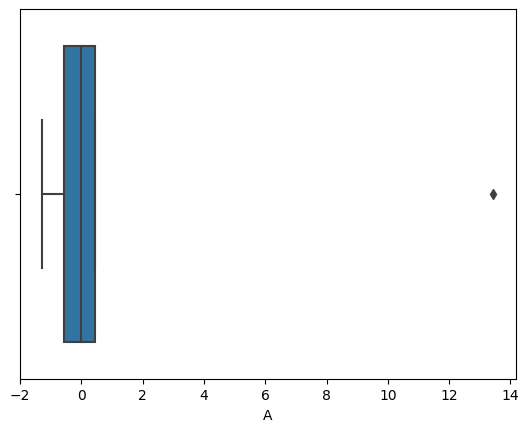

In [41]:
sns.boxplot(x = df_s['A'])

In [42]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)
print(df_s)

[[ 1.98921509  1.2094158   0.48733323]
 [-0.35558508  0.77748158  0.57219225]
 [-0.43288619 -0.95025527  0.42671965]
 [-0.6647895   0.34554737 -1.9978238 ]
 [-0.53595433 -1.38218948  0.51157867]]


## III. Mã hóa dữ liệu

##### Các kiểu dữ liệu: (đều là text)
- Danh nghĩa (nominal)
- Thứ tự (ordinal)

##### Các phương pháp mã hóa dữ liệu:
- One hot encoding: Dữ liệu dạng text không có thứ thự
- Label encoding
- Ordinal encoding

### 1. One hot encoding (Áp dụng Norminal cho loại ít giá trị dữ liệu)

In [43]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# Dạng array 2 chiều
data = asarray([['red'],['red'],['yellow'],['green'],['yellow']])
data

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow']], dtype='<U6')

In [44]:
type(data)

numpy.ndarray

In [45]:
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(data)
onehot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [46]:
# Nếu có dạng list => chuyển sang dạng array numpy
dm = ['red','red','yellow','green','yellow','blue']
sr = np.array(dm)
#  hàng 1 cột
sr = sr.reshape(-1,1)
sr

array([['red'],
       ['red'],
       ['yellow'],
       ['green'],
       ['yellow'],
       ['blue']], dtype='<U6')

In [47]:
onehot = encoder.fit_transform(sr)
onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [48]:
ser = pd.Series(dm)
ser

0       red
1       red
2    yellow
3     green
4    yellow
5      blue
dtype: object

In [49]:
onehot = encoder.fit_transform(ser.values.reshape(-1,1))
onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [50]:
df = ['red','red','yellow','green','yellow','blue']
df = pd.DataFrame(df,index=[1,2,3,4,5,6], columns=['color'])
df

,color
1,red
2,red
3,yellow
4,green
5,yellow
6,blue


In [51]:
onehot = encoder.fit_transform(df['color'].values.reshape(-1,1))
onehot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [52]:
# Mã hóa với pandas
pd.get_dummies(df)

,color_blue,color_green,color_red,color_yellow
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
5,0,0,0,1
6,1,0,0,0


### 2. Label encoding (thường sữ dụng từ 0, ordinal)

In [53]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lb = encoder.fit_transform(['red','red','yellow','green','yellow'])
lb

array([1, 1, 2, 0, 2], dtype=int64)

In [54]:
lb = encoder.fit_transform(df['color'].values)
lb

array([2, 2, 3, 1, 3, 0])

In [55]:
# Mã hóa với pandas
df['color'].dtype

dtype('O')

In [56]:
df

,color
1,red
2,red
3,yellow
4,green
5,yellow
6,blue


In [57]:
df['color'].astype('category').cat.codes

1    2
2    2
3    3
4    1
5    3
6    0
dtype: int8

### 3. Ordinal encoding

In [58]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['S',1],['M',2],['L',3]]
enc.fit_transform(X)

array([[2., 0.],
       [1., 1.],
       [0., 2.]])

In [59]:
df = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High", "Low", "Medium","High", "Low"]})
df

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High
5,Low
6,Medium
7,High
8,Low


In [60]:
scale_mapper = {"Low":1,"Medium":2,"High":3}
df["Scale"] = df["Score"].replace(scale_mapper)
df

,Score,Scale
0,Low,1
1,Low,1
2,Medium,2
3,Medium,2
4,High,3
5,Low,1
6,Medium,2
7,High,3
8,Low,1


## IV. Rời rạc hóa dữ liệu

### 1.Dùng hàm cut

In [61]:
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
pd.cut(ages,bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [62]:
# Lấy biên bên phải
cut_data = pd.cut(ages,4)
cut_data

[(19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], ..., (30.25, 40.5], (50.75, 61.0], (40.5, 50.75], (40.5, 50.75], (30.25, 40.5]]
Length: 12
Categories (4, interval[float64, right]): [(19.959, 30.25] < (30.25, 40.5] < (40.5, 50.75] < (50.75, 61.0]]

### 2.Dùng hàm qcut

In [63]:
cut_data = pd.qcut(ages,4)
cut_data

[(19.999, 22.75], (19.999, 22.75], (22.75, 29.0], (22.75, 29.0], (19.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64, right]): [(19.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

In [81]:
df=pd.DataFrame(['good', 'excellent', 'very_good', 'poor', 'excellent'], columns=["feedback"])
encoder = OrdinalEncoder(encoding_method='ordered', variables=['poor', 'good', 'very_good','excellent'])

TypeError: OrdinalEncoder.__init__() got an unexpected keyword argument 'encoding_method'